### Importing necessary libraries and frameworks

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
warnings.filterwarnings("ignore")

### Collecting, Analyzing and Visualizing the Data

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    paths = []
    for filename in filenames:
        path = os.path.join(dirname, filename)
        paths.append(path)
        print(path)

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [4]:
df = pd.read_csv(paths[1])

In [5]:
df.shape

(42000, 785)

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [11]:
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

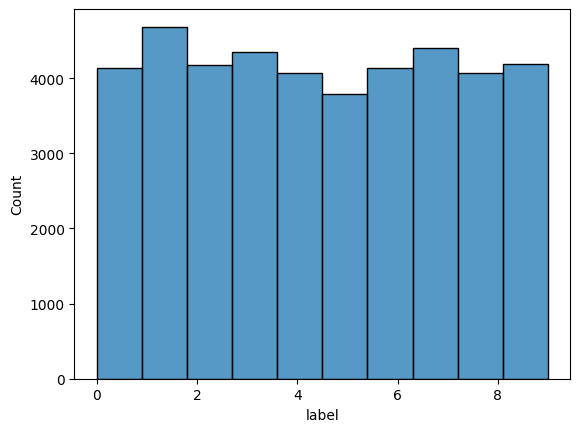

In [12]:
sns.histplot(x = 'label', data = df, bins = len(np.unique(df['label'])))
plt.show()

In [13]:
X_train = df.drop('label', axis = 1).values
y_train = df['label'].values

1


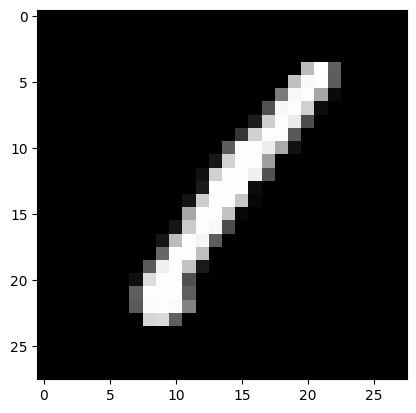

0


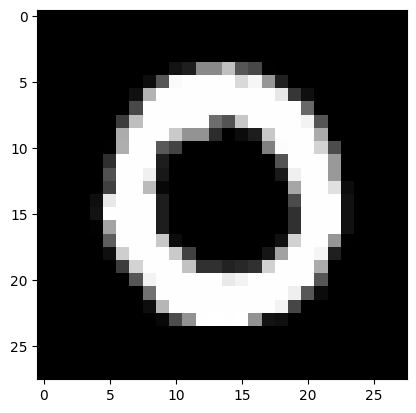

1


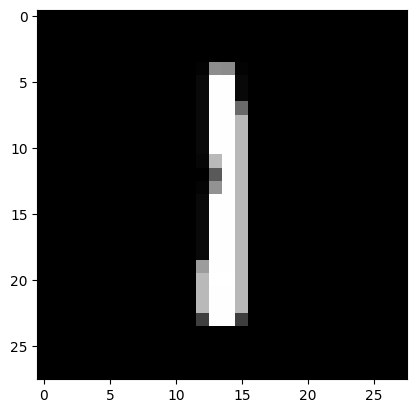

4


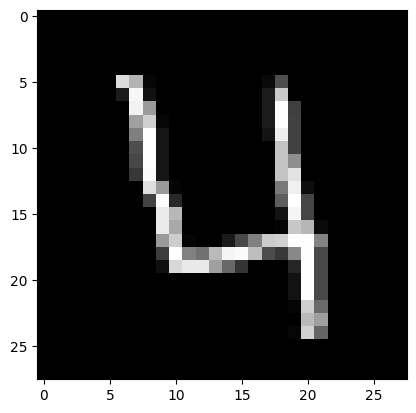

0


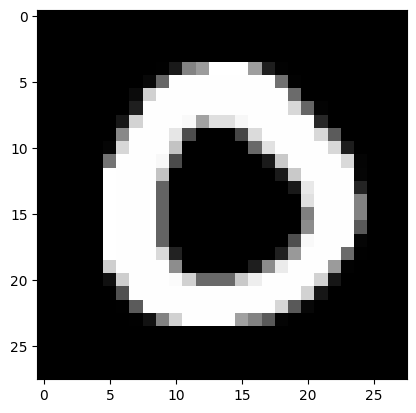

In [14]:
for idx, x in enumerate(X_train[:5]):
    img = x.reshape(28, 28)
    print(y_train[idx])
    plt.gray()
    plt.imshow(img)
    plt.show()

In [15]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [16]:
X_train.shape

(42000, 28, 28, 1)

In [17]:
# Scaling the features

X_train = X_train / 255

### Training the Model ( CNN )

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 200, kernel_size = (3, 3), input_shape = X_train[0].shape, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 10, activation = "softmax")
])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

model.fit(X_train, y_train, epochs = 15)

Epoch 1/15
1313/1313 [==============================] - 11s 3ms/step - loss: 0.1927 - acc: 0.9436
Epoch 2/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0737 - acc: 0.9774
Epoch 3/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0549 - acc: 0.9830
Epoch 4/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0451 - acc: 0.9861
Epoch 5/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0387 - acc: 0.9881
Epoch 6/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0319 - acc: 0.9897
Epoch 7/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0270 - acc: 0.9921
Epoch 8/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0209 - acc: 0.9937
Epoch 9/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0189 - acc: 0.9940
Epoch 10/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0139 - acc: 0.9958
Epoch 11/15
1313/1313 [=====

### Evaluating the model's performance

In [19]:
# Evaluating the model on training set

model.evaluate(X_train, y_train)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0027 - acc: 0.9995


[0.0026687169447541237, 0.9994761943817139]

In [20]:
# Making predictions on training set

y_train_pred = model.predict(X_train)
y_train_pred_labels = np.array([np.argmax(y) for y in y_train_pred])

1313/1313 [==============================] - 2s 1ms/step


tf.Tensor(
[[4131    0    0    0    0    0    1    0    0    0]
 [   0 4684    0    0    0    0    0    0    0    0]
 [   0    1 4171    1    0    0    0    2    1    1]
 [   0    0    1 4349    0    0    0    0    0    1]
 [   0    2    0    0 4066    0    0    1    0    3]
 [   0    0    0    0    0 3795    0    0    0    0]
 [   0    0    0    0    0    0 4137    0    0    0]
 [   0    1    0    0    0    0    0 4400    0    0]
 [   0    0    1    0    0    1    0    0 4060    1]
 [   0    0    0    0    1    1    0    1    0 4185]], shape=(10, 10), dtype=int32)


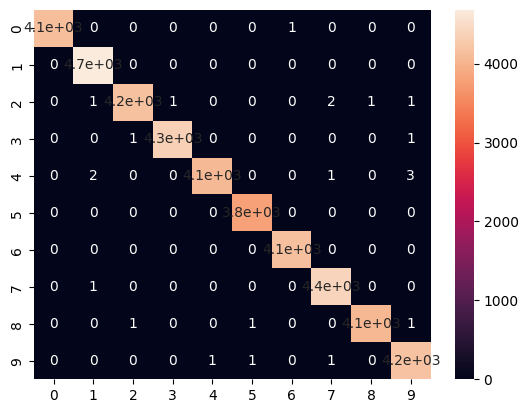

In [21]:
# Confusion Matrix

cm = tf.math.confusion_matrix(labels = y_train, predictions = y_train_pred_labels)
print(cm)

sns.heatmap(cm, annot = True)
plt.show()

In [22]:
# Classification Metrics

acc = metrics.accuracy_score(y_train, y_train_pred_labels)
precision = metrics.precision_score(y_train, y_train_pred_labels, average = "weighted")
recall = metrics.recall_score(y_train, y_train_pred_labels, average = "weighted")
f1 = metrics.f1_score(y_train, y_train_pred_labels, average = "weighted")

print(f"Accuracy : {acc}\nPrecision : {precision}\nRecall : {recall}\nF1 Score : {f1}")

Accuracy : 0.9994761904761905
Precision : 0.9994763775938202
Recall : 0.9994761904761905
F1 Score : 0.9994761630676724


In [23]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred_labels)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       1.00      1.00      1.00      4684
           2       1.00      1.00      1.00      4177
           3       1.00      1.00      1.00      4351
           4       1.00      1.00      1.00      4072
           5       1.00      1.00      1.00      3795
           6       1.00      1.00      1.00      4137
           7       1.00      1.00      1.00      4401
           8       1.00      1.00      1.00      4063
           9       1.00      1.00      1.00      4188

    accuracy                           1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000



### Testing the model

In [24]:
df = pd.read_csv(paths[2])
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X_test = df.values
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) / 255

In [26]:
# Making predictions on test set

y_test_pred = model.predict(X_test)
y_test_pred_labels = np.array([np.argmax(y) for y in y_test_pred])

875/875 [==============================] - 1s 1ms/step


In [27]:
path = os.path.join("/kaggle", "working", "submission.csv")

result = pd.DataFrame(np.c_[np.arange(1, len(y_test_pred_labels) + 1), y_test_pred_labels], columns = ['ImageId', 'Label'])
result.to_csv(path, index = False)

In [28]:
r = pd.read_csv(path)
r.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
